 # 1.  Determine how many different topics, and what they are, exist in an aggregation of ALL corpuses together (50 points)

### Install some packages

In [1]:
pip install gensim==3.8.3

  Using cached gensim-3.8.3.tar.gz (23.4 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [955 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-11.0-arm64-cpython-310
      creating build/lib.macosx-11.0-arm64-cpython-310/gensim
      copying gensim/interfaces.py -> build/lib.macosx-11.0-arm64-cpython-310/gensim
      copying gensim/downloader.py -> build/lib.macosx-11.0-arm64-cpython-310/gensim
      copying gensim/matutils.py -> build/lib.macosx-11.0-arm64-cpython-310/gensim
      copying gensim/__init__.py -> build/lib.macosx-11.0-arm64-cpython-310/gensim
      copying gensim/utils.py -> build/lib.macosx-11.0-arm64-cpython-310/gensim
      copying gensim/nosy.py -> build/lib.macosx-11.0-arm64-cpython-310/gensim
      creating build/lib.macosx-11.0-arm64-cpython-310/gensim/simila

      /Users/user/miniforge3/include/python3.10/cpython/unicodeobject.h:451:35: note: expanded from macro 'PyUnicode_WSTR_LENGTH'
      #define PyUnicode_WSTR_LENGTH(op) _PyUnicode_get_wstr_length((PyObject*)op)
                                        ^
      /Users/user/miniforge3/include/python3.10/cpython/unicodeobject.h:445:1: note: '_PyUnicode_get_wstr_length' has been explicitly marked deprecated here
      Py_DEPRECATED(3.3)
      ^
      /Users/user/miniforge3/include/python3.10/pyport.h:513:54: note: expanded from macro 'Py_DEPRECATED'
      #define Py_DEPRECATED(VERSION_UNUSED) __attribute__((__deprecated__))
                                                           ^
      13 warnings generated.
      clang -bundle -undefined dynamic_lookup -Wl,-rpath,/Users/user/miniforge3/lib -L/Users/user/miniforge3/lib -Wl,-rpath,/Users/user/miniforge3/lib -L/Users/user/miniforge3/lib build/temp.macosx-11.0-arm64-cpython-310/gensim/models/word2vec_inner.o -o build/lib.macosx-11.0-arm64-

Failed to build gensim
  Attempting uninstall: gensim
    Found existing installation: gensim 4.2.0
    Uninstalling gensim-4.2.0:
      Successfully uninstalled gensim-4.2.0
  Running setup.py install for gensim ... error
  error: subprocess-exited-with-error
  
  × Running setup.py install for gensim did not run successfully.
  │ exit code: 1
  ╰─> [957 lines of output]
      running install
      /Users/user/miniforge3/lib/python3.10/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
        warnings.warn(
      running build
      running build_py
      creating build
      creating build/lib.macosx-11.0-arm64-cpython-310
      creating build/lib.macosx-11.0-arm64-cpython-310/gensim
      copying gensim/interfaces.py -> build/lib.macosx-11.0-arm64-cpython-310/gensim
      copying gensim/downloader.py -> build/lib.macosx-11.0-arm64-cpython-310/gensim
      copying gensim/mat

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [7]:
!python -m spacy download en_core_web_sm

Traceback (most recent call last):
  File "__init__.pxd", line 942, in numpy.import_array
RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/user/.pyenv/versions/3.9.4/lib/python3.9/runpy.py", line 188, in _run_module_as_main
    mod_name, mod_spec, code = _get_module_details(mod_name, _Error)
  File "/Users/user/.pyenv/versions/3.9.4/lib/python3.9/runpy.py", line 147, in _get_module_details
    return _get_module_details(pkg_main_name, error)
  File "/Users/user/.pyenv/versions/3.9.4/lib/python3.9/runpy.py", line 111, in _get_module_details
    __import__(pkg_name)
  File "/Users/user/.pyenv/versions/mds_env/lib/python3.9/site-packages/spacy/__init__.py", line 14, in <module>
    from . import pipeline  # noqa: F401
  File "/Users/user/.pyenv/versions/mds_env/lib/python3.9/site-packages/spacy/pipeline/__init__.py", line 1, in <mod

### Load libraries and data file

In [1]:
pwd

'/Users/user/Documents/Columbia/QMSS/Spring2022/NLP'

In [1]:
from pprint import pprint
%matplotlib inline

In [2]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import re
import gensim
from gensim.utils import simple_preprocess
import spacy
from tqdm import tqdm
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#read text corpus
df= pd.read_csv('hw2.csv')
data = pd.read_csv("hw2.csv")["body"].to_list()

### Prepare Stopwords

In [4]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [5]:
# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]


<>:2: DeprecationWarning: invalid escape sequence '\S'
<>:5: DeprecationWarning: invalid escape sequence '\s'
<>:2: DeprecationWarning: invalid escape sequence '\S'
<>:5: DeprecationWarning: invalid escape sequence '\s'
/var/folders/3x/m9j5lcm97lq9nx_kfbj6r0wc0000gn/T/ipykernel_60923/476429649.py:2: DeprecationWarning: invalid escape sequence '\S'
  data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
/var/folders/3x/m9j5lcm97lq9nx_kfbj6r0wc0000gn/T/ipykernel_60923/476429649.py:5: DeprecationWarning: invalid escape sequence '\s'
  data = [re.sub('\s+', ' ', sent) for sent in data]


### Tokenize words and Clean-up text

In [6]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

In [7]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

###  Remove Stopwords, Make Bigrams and Lemmatize

In [8]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [9]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)


In [13]:
!python3 -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 9.7 MB/s eta 0:00:00:00:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [10]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# print(data_lemmatized[:1])

In [11]:
! spacy download en_core_web_sm


Traceback (most recent call last):
  File "__init__.pxd", line 942, in numpy.import_array
RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/user/.pyenv/versions/mds_env/bin/spacy", line 5, in <module>
    from spacy.cli import setup_cli
  File "/Users/user/.pyenv/versions/3.9.4/envs/mds_env/lib/python3.9/site-packages/spacy/__init__.py", line 14, in <module>
    from . import pipeline  # noqa: F401
  File "/Users/user/.pyenv/versions/3.9.4/envs/mds_env/lib/python3.9/site-packages/spacy/pipeline/__init__.py", line 1, in <module>
    from .attributeruler import AttributeRuler
  File "/Users/user/.pyenv/versions/3.9.4/envs/mds_env/lib/python3.9/site-packages/spacy/pipeline/attributeruler.py", line 6, in <module>
    from .pipe import Pipe
  File "spacy/pipeline/pipe.pyx", line 1, in init spacy.pipeline.pipe
  File "spacy/vocab.pyx", 

### Create the Dictionary and Corpus needed for Topic Modeling

In [11]:
import gensim.corpora as corpora
from gensim.models import CoherenceModel
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


In [12]:
start = 3
limit = 20
step = 1

log_perplexity_list = []
cohenrence_lda_list = []

for num_topics in tqdm(range(start, limit, step)):
    #print(num_topics)
    
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=100,
                                               update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
    
    # Compute Perplexity
    #print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
    log_perplexity_list.append(lda_model.log_perplexity(corpus))
    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    #print('\nCoherence Score: ', coherence_lda)
    cohenrence_lda_list.append(coherence_lda)

  0%|                                                    | 0/17 [00:00<?, ?it/s]<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C head

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
 35%|███████████████▌                            | 6/17 [00:25<00:48,  4.37s/it]<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C head

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
 71%|██████████████████████████████▎            | 12/17 [00:54<00:23,  4.72s/it]<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C head

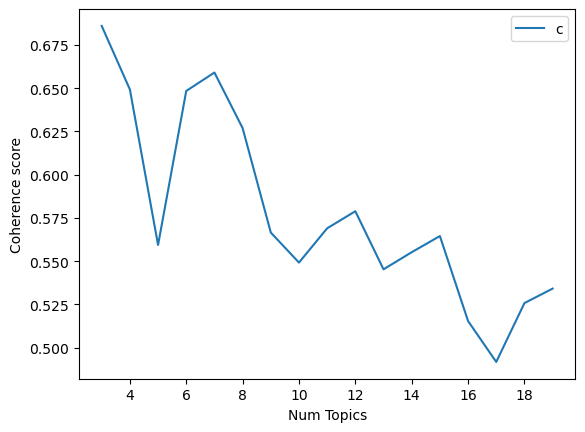

In [14]:
x = range(start, limit, step)
plt.plot(x, cohenrence_lda_list)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [18]:
# choose num_topics as the best from the plot above!

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics= 4, 
        random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
    

In [19]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.508860552684266


<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scip


Coherence Score:  0.6492509162980119


In [20]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/Users/user/miniforge3/lib/python3.10/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.138791  0.069007       1        1  27.570736
0      0.065913 -0.198920       2        1  27.464542
3      0.202340  0.119070       3        1  27.070585
2     -0.129463  0.010843       4        1  17.894137, topic_info=          Term        Freq       Total Category  logprob  loglift
767  steelhead  656.000000  656.000000  Default  30.0000  30.0000
171      space  870.000000  870.000000  Default  29.0000  29.0000
527    fishing  479.000000  479.000000  Default  28.0000  28.0000
525       fish  457.000000  457.000000  Default  27.0000  27.0000
357       tree  317.000000  317.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
637       move   30.942528   58.984306   Topic4  -5.7864   1.0756
616       make   35.698333  180.777282   Topic4  -5.6434   0.0985
524      first   34.513881  207.270867   Topic4  -5.6772  -0.0720
19        call   32.050410   95.792598   Topic4  -5.7512   0.6258
926       moon   32.297713  130.659488   Topic4  -5.7435   0.3231

[276 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
215       1  0.110327     air
215       2  0.018388     air
215       3  0.183879     air
215       4  0.661964     air
376       1  0.028998   allow
...     ...       ...     ...
845       1  0.436281    year
845       2  0.237202    year
845       3  0.237202    year
845       4  0.088951    year
368       3  0.993438  yellow

[465 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3])

# 2. Once you get a the list of topics, assign each corpus to a topic through an automated tagging process (assign each corpus to a topic) of your choice (50 points)

In [22]:
# def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
#     # Init output
#     sent_topics_df = pd.DataFrame()

#     # Get main topic in each document
#     for i, row in enumerate(ldamodel[corpus]):
#         row = sorted(row, key=lambda x: (x[1]), reverse=True)
#         # Get the Dominant topic, Perc Contribution and Keywords for each document
#         for j, (topic_num, prop_topic) in enumerate(row):
#             if j == 0:  # => dominant topic
#                 wp = ldamodel.show_topic(topic_num)
#                 topic_keywords = ", ".join([word for word, prop in wp])
#                 sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
#             else:
#                 break
#     sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

#     # Add original text to the end of the output
#     contents = pd.Series(texts)
#     sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
#     return(sent_topics_df)


# df_topic_sents_keywords = format_topics_sentences(ldamodel=coherence_model_lda, corpus=corpus, texts=data)

# # Format
# df_dominant_topic = df_topic_sents_keywords.reset_index()
# df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# # Show
# df_dominant_topic.head(10)